# **[Chapter 04 머신러닝 실전 예측 모델링 - Classification(분류)]**  
**┗ 신용카드 연체 예측**
---
> **목차(Context)**

* 문제상황 및 데이터 살펴보기
* Data Spec Check
* 문제해결 프로세스 정의
* 🥉Session 1 - 「Data Info check」
* 🥈Session 2 - 「Data Readiness Check & Feature Engineering」
* 🥇Session 3 - 「Modeling Process」

In [3]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
#from google.colab import drive
#drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
#import os
#os.chdir("/content/drive/MyDrive/Colab Notebooks/00.Fast_campus/06.Master/Chapter04")
#os.getcwd()

import os 
print(os.getcwd())

d:\ML


## **문제상황 및 데이터 살펴보기**
---
> **시나리오**

```
A사는 신용카드업을 운영하고 있는 회사다. A사는 최근 공격적인 마케팅을 통해 신규 회원 카드 발급률(%)을 끌어올리고 있는 상황이다. 성공적인 마케팅 결과로  
인해 신규 회원 카드 발급률(%)을 원하는 목표를 달성하였지만, 연체가 심하게 발생하고 있는 상황이다. 이에 A사는 연체 가능성이 높은 고객을 예측하고 사전   
관리를 통해 해당 이슈를 해결하고자 한다.

```  

> **데이터 살펴보기**

* 고객 Demo
* 데이터 명세 ⬇

|Column|Description|
|:---|:---|
|index|인덱스|
|gender|성별|
|car|차량 소유 여부|
|reality|부동산 소유 여부|
|child_num|자녀 수|
|income_total|연간 소득|
|income_type|소득 분류|
|edu_type|교육 수준|
|family_type|결혼 여부|
|house_type|생활 방식|
|DAYS_BIRTH|출생일|
|DAYS_EMPLOYED|업무 시작일|
|FLAG_MOBIL|핸드폰 소유 여부|
|work_phone|업무용 전화 소유 여부|
|phone|전화 소유 여부|
|email|이메일 소유 여부|
|occyp_type|직업 유형|
|family_size|가족 규모|
|begin_month|신용카드 발급 월|
|credit|사용자의 신용카드 대금 연체를 기준으로 한 신용도|
※ credit : 낮을 수록 높은 신용의 신용카드 사용자를 의미함




In [ ]:
# ▶ pd.set option
import json
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',100) # set_option : 행과 열의 옵션을 설정
pd.set_option('display.max_rows',100)

# ▶ Data read
df = pd.read_csv("D:/ML/ch04_df.csv")
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


## **Data Spec Check**
---
> **Data 가공 명세서**

```
* code로 선언된 col을 meta 정보를 활용하여 변환하는 작업 수행
```  

<img src = "">

In [ ]:
# ▶ head
df.head(2)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0


In [ ]:
df['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

In [ ]:
dic_cd =  {'Working': 'code1',
           'Commercial associate':'code2',
           'Pensioner': 'code3',
           'State servant': 'code4',
           'Student': 'code5'}

# dic_cd_meta = {'code1' : 'Working',
#                'code2' : 'Commercial associate',
#                'code3' : 'Pensioner',
#                'code4' : 'State servant',
#                'code5' : 'Student'}

In [ ]:
dic_cd

{'Working': 'code1',
 'Commercial associate': 'code2',
 'Pensioner': 'code3',
 'State servant': 'code4',
 'Student': 'code5'}

In [ ]:
df['income_type'] = df['income_type'].apply(lambda x : dic_cd[x])

In [ ]:
df.head(2)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,code2,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,code2,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0


In [ ]:
# Working                 13645
# Commercial associate     6202
# Pensioner                4449
# State servant            2154
# Student                     7

df['income_type'].value_counts()

code1    13645
code2     6202
code3     4449
code4     2154
code5        7
Name: income_type, dtype: int64


## **문제해결 프로세스 정의**
---
> **문제정의**

```
▶ 현상 : 신용카드 신규 발급 중가에 따른 연체자 수 증가
▶ 리스크 : 카드 대금 회수 지연으로 인한 자금 유동성 문제 발생
```  

> **기대효과**

```
▶ 연체자 카드 대금 회수로 자금 유동성 증가
▶ 연체자 예측 모델 활용 연체자 관리 프로그램 및 마케팅 활용 (※ 추가 상품 유도, 리볼빙 등)
```

> **해결방안**

```
▶ 신용카드 가입 회원 정보 활용 연체자 예측 모델 개발
▶ 연체자 예측 모델을 통해 예측한 고객 대상 관리 프로그램 운영
```

> **성과측정**  

```
▶ 예측 모델 활용 전/후 정량적 지표 비교
▶ As-is : 예측 모델 활용 전 자금 유동성 비율(%)
▶ To-be : 예측 모델 활용 후 자금 유동성 비율(%)
▶ 연체자 가능성 高 고객 대상 추가 마케팅 진행으로 창출한 수익도 추가로 확인
```

> **모델운영**  

```
▶ 신용카드 가입 회원 정보 수집 및 전처리
▶ 최근 N개월 회원 신용카드 사용 이력 및 고객 Demo 정보 활용 예측 모델 개발
▶ 매 월 예측 모델 활용 연체 가능성 高 고객 추출 및 관리
```

> **주요 코드 미리 살펴보기**  

```
▶ Session 1 → df['occyp_type'].fillna('etc')
▶ Session 2 → np.where(df['credit'] == 2, 1, 0), optb.transform(df['DAYS_BIRTH'], metric="bins")
▶ Session 3 → encoder = LabelEncoder(), pd.crosstab(pd.cut(y_pred_train_proba, bins, right=False), y_train , rownames=['Predicted'], colnames=['Actual'], margins=True)
```

## **🥉Session 1**  
**┗ Data Info check**  
---

### · Data 전처리  
---
> **수집된 데이터의 기본 정보들을 확인**

```
* Data를 Read하고 데이터의 형태, 타입, 기간 등 전반적인 기본 정보를 파악하는 단계  
* 기본 사항을 확인하며 전처리도 같이 수행함

  (1) Data shape(형태) 확인
  (2) Data type 확인
  (3) Null값 확인 (※ 빈 값의 Data)
  (4) 중복 데이터 확인
  (5) Outlier 확인 (※ 정상적인 범주를 벗어난 Data)  
```

In [ ]:
# ▶ Data 형태 확인
# ▶ 26,457 row, 20 col로 구성됨
df.shape

(26457, 20)

In [ ]:
# ▶ Data type 확인
print(df.iloc[1,:])
print('-------------------------------------')
print(df.info())

index                                        1
gender                                       F
car                                          N
reality                                      Y
child_num                                    1
income_total                          247500.0
income_type                              code2
edu_type         Secondary / secondary special
family_type                     Civil marriage
house_type                   House / apartment
DAYS_BIRTH                              -11380
DAYS_EMPLOYED                            -1540
FLAG_MOBIL                                   1
work_phone                                   0
phone                                        0
email                                        1
occyp_type                            Laborers
family_size                                3.0
begin_month                               -5.0
credit                                     1.0
Name: 1, dtype: object
-------------------------------------

In [ ]:
# ▶ Null 값 확인
print(df.isnull().sum())

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64


In [ ]:
# ▶ Null 값이 차지하는 비중을 계산 후 Sorting
df_null = pd.DataFrame(df.isnull().sum(), columns=['null'])
df_null['null_ratio'] = df_null['null'] / len(df)
df_null.sort_values(by=['null_ratio'], ascending=False)

,null,null_ratio
occyp_type,8171,0.308841
index,0,0.000000
gender,0,0.000000
begin_month,0,0.000000
family_size,0,0.000000
email,0,0.000000
phone,0,0.000000
work_phone,0,0.000000
FLAG_MOBIL,0,0.000000
DAYS_EMPLOYED,0,0.000000


In [ ]:
# ▶ null 값이 전체 Data set의 70% 초과인 col 추출
list(df_null[df_null['null_ratio'] > 0.70].index)

[]

In [ ]:
# ▶ 30% NA col 사용 결정, 'ETC'로 처리
df['occyp_type'] = df['occyp_type'].fillna('etc')
df.isnull().sum()

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
dtype: int64

In [ ]:
# ▶ occyp_type null 처리 확인
df['occyp_type'].value_counts()

etc                      8171
Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

In [ ]:
# ▶ Zero 비율 확인
list_of_df = []

for i in df.columns :
 loof_df = pd.DataFrame({'val' : [i],
              'zero_cnt': df[df[i] == 0].count()[0]})
 list_of_df.append(loof_df)

df_merge  = pd.concat(list_of_df).reset_index(drop=True)
df_merge['zero_ratio'] = df_merge['zero_cnt'] / len(df)
df_merge.sort_values(by=['zero_ratio'], ascending = False)

,val,zero_cnt,zero_ratio
15,email,24042,0.908720
13,work_phone,20511,0.775258
14,phone,18672,0.705749
4,child_num,18340,0.693200
19,credit,3222,0.121783
18,begin_month,231,0.008731
0,index,1,0.000038
7,edu_type,0,0.000000
8,family_type,0,0.000000
9,house_type,0,0.000000


In [ ]:
# ▶ zero col은 모두 0이기 때문에 삭제 필요
# ▶ 90%를 초과하는 Col도 큰 의미는 없지만, 우선 모델링 후 제거하는 방향성으로 진행
df.shape

(26457, 20)

### · Data EDA
---
> **수집된 데이터의 기본 정보들을 확인**

```
* Target 변수 탐색
* 숫자형 변수와 범주형 변수 탐색
```

In [ ]:
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,code2,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,etc,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,code2,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,code1,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,code2,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,code4,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [ ]:
# ▶ meta 정보 활용 변환
dic_cd_meta = {'code1' : 'Working',
               'code2' : 'Commercial associate',
               'code3' : 'Pensioner',
               'code4' : 'State servant',
               'code5' : 'Student'}

df['income_type'] = df['income_type'].apply(lambda x : dic_cd_meta[x])
df['income_type'].head()

0    Commercial associate
1    Commercial associate
2                 Working
3    Commercial associate
4           State servant
Name: income_type, dtype: object

In [ ]:
df['income_type'].value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

In [ ]:
# ▶ Target ratio (multi-classifiaction 문제)
print(df['credit'].value_counts())
print('')
print(df['credit'].value_counts(normalize=True))

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64

2.0    0.641343
1.0    0.236875
0.0    0.121783
Name: credit, dtype: float64


In [ ]:
import numpy as np
import pandas as pd
# ▶ numeric, categorical value 나누기
numerical_list=[]
categorical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categorical_list.append(i)
  else :
    numerical_list.append(i)


print("numerical_list:", numerical_list)
print("categorical_list:", categorical_list)

numerical_list: ['index', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'begin_month', 'credit']
categorical_list: ['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']


In [ ]:
# ▶ numerical_list value unique 값 확인 (1)
for i in numerical_list :
  print(i,":",df[i].nunique())

index : 26457
child_num : 9
income_total : 249
DAYS_BIRTH : 6621
DAYS_EMPLOYED : 3470
FLAG_MOBIL : 1
work_phone : 2
phone : 2
email : 2
family_size : 10
begin_month : 61
credit : 3


In [ ]:
# ▶ numerical_list value unique 값 확인 (1)
list_of_df = []

for i in numerical_list :
 loof_df = pd.DataFrame({'val' : [i],
              'nunique': df[i].nunique()})
 list_of_df.append(loof_df)

df_merge  = pd.concat(list_of_df).reset_index(drop=True)
df_merge.sort_values(by=['nunique'], ascending = False)

,val,nunique
0,index,26457
3,DAYS_BIRTH,6621
4,DAYS_EMPLOYED,3470
2,income_total,249
10,begin_month,61
9,family_size,10
1,child_num,9
11,credit,3
6,work_phone,2
7,phone,2


In [ ]:
# ▶ categorical_list value unique 값 확인 (1)
list_of_df = []

for i in categorical_list :
 loof_df = pd.DataFrame({'val' : [i],
              'nunique': df[i].nunique()})
 list_of_df.append(loof_df)

df_merge  = pd.concat(list_of_df).reset_index(drop=True)
df_merge.sort_values(by=['nunique'], ascending = False)

,val,nunique
7,occyp_type,19
6,house_type,6
3,income_type,5
4,edu_type,5
5,family_type,5
0,gender,2
1,car,2
2,reality,2


In [ ]:
change_list = ['credit', 'work_phone', 'phone', 'email', 'FLAG_MOBIL']

for i in change_list :
  numerical_list.remove(i)


for i in change_list :
  categorical_list.append(i)

print("numerical_list:", numerical_list)
print("categorical_list:", categorical_list)

numerical_list: ['index', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'begin_month']
categorical_list: ['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'credit', 'work_phone', 'phone', 'email', 'FLAG_MOBIL']


## **🥈Session 2**  
**┗ Data Readiness Check & Feature Engineering**  
---


### · Data Readiness Check
---
> 현재 가지고 있는 데이터의 수준으로 문제를 해결할 수 있는지 점검

```
(1) Target label 생성
(2) Target Ratio 확인
(3) 분석 방향성 결정
```

In [ ]:
# ▶ Target ratio
# ▶ credit : 낮을 수록 높은 신용의 신용카드 사용자를 의미함
print(df['credit'].value_counts())
print('------------------------------------------------')
print(df['credit'].value_counts(normalize=True))

2.0    16968
1.0     6267
0.0     3222
Name: credit, dtype: int64
------------------------------------------------
2.0    0.641343
1.0    0.236875
0.0    0.121783
Name: credit, dtype: float64


In [ ]:
# ▶ 0 = 높은 신용도, 가장 신용도가 낮은 2를 찾는 문제로 해결 (Multi > Binary)
df['credit'] = np.where(df['credit'] == 2, 1, 0)
print(df['credit'].value_counts())
print('')
print(df['credit'].value_counts(normalize=True))

1    16968
0     9489
Name: credit, dtype: int64

1    0.641343
0    0.358657
Name: credit, dtype: float64


In [ ]:
categorical_list

['gender',
 'car',
 'reality',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'occyp_type',
 'credit',
 'work_phone',
 'phone',
 'email',
 'FLAG_MOBIL']

In [ ]:
# ▶ sample col eda
eda_df = df.groupby('occyp_type')['credit'].agg(cnt =('count'), t_cnt=('sum')).reset_index()
eda_df['t_ratio'] = eda_df['t_cnt'] / eda_df['cnt']
eda_df.sort_values(by=['t_ratio'], ascending = False)

,occyp_type,cnt,t_cnt,t_ratio
5,HR staff,62,51,0.822581
16,Security staff,424,297,0.700472
13,Realty agents,63,44,0.698413
11,Medicine staff,864,590,0.682870
1,Cleaning staff,403,270,0.669975
9,Low-skill Laborers,127,84,0.661417
10,Managers,2167,1429,0.659437
4,Drivers,1575,1030,0.653968
18,etc,8171,5266,0.644474
3,Core staff,2646,1677,0.633787


### · Feature Engineering
---
> **Target 변수와의 의미있는 변수 선택하는 방법**

```
* Classification(분류) : bin(통)으로 구분 후 Target 변수와의 관계 파악
```

> **IV (Information Value)**

```
* Feature 하나가 Good(Target)과 Bad(Non-target)을 잘 구분해줄 수 있는지에 대한 정보량을 표현하는 방법론
* IV 수치가 클수록 Target과 Non-target을 잘 구분할 수 있는 정보량이 많은 Feature이고, IV 수치가 작을수록 정보량이 적은 Feature
* (Target data 구성비 - Non-target data 구성비) * WoE
* WoE(Weight of Evidence) = ln(Target data 구성비 / Non-target data 구성비)
* ln(자연로그)를 취하는 이유? : WoE의 최대, 최소값의 범위를 맞춰주기 위해 (1~∞ , -∞~1)
```

> #### **└ Numerical features**

In [ ]:
!pip install optbinning

In [ ]:
# ▶ numeric
# !pip install optbinning
from optbinning import OptimalBinning

iv_df = []

for i in numerical_list :
  variable = i
  x = df[variable].values
  y = df.credit
  # max_n_prebins
  optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", max_n_prebins=3)
  optb.fit(x, y)
  # print("split points : ", optb.splits)

  binning_table = optb.binning_table
  v1 = binning_table.build()

  loop_df = pd.DataFrame({'val' : variable,
                     'IV' : [v1.loc['Totals','IV']]})
  iv_df.append(loop_df)

iv_df = pd.concat(iv_df).reset_index(drop=True)
iv_df.sort_values(by=['IV'], ascending = False)


# binning_table.plot(metric="event_rate")

(CVXPY) Apr 09 02:35:10 AM: Encountered unexpected exception importing solver GLOP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')
(CVXPY) Apr 09 02:35:10 AM: Encountered unexpected exception importing solver PDLP:
RuntimeError('Unrecognized new version of ortools (9.6.2534). Expected < 9.5.0.Please open a feature request on cvxpy to enable support for this version.')


,val,IV
6,begin_month,1.006220
3,DAYS_BIRTH,0.011866
4,DAYS_EMPLOYED,0.007658
2,income_total,0.002783
5,family_size,0.001626
1,child_num,0.000981
0,index,0.000894


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -8.50)",21737,0.821597,6557,15180,0.698348,-0.25825,0.052583,0.006555
1,"[-8.50, -3.50)",3003,0.113505,1230,1773,0.590410,0.215537,0.005417,0.000676
2,"[-3.50, inf)",1717,0.064898,1702,15,0.008736,5.312705,0.948220,0.059678
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,26457,1.000000,9489,16968,0.641343,,1.006220,0.066909


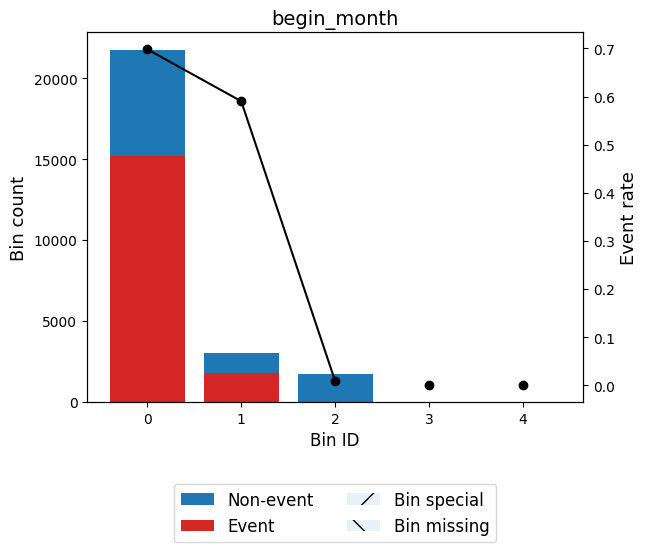

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['default'])

# ▶ numeric one col plotting
variable = 'begin_month'
x = df[variable].values
y = df.credit
# max_n_prebins
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", max_n_prebins=3)
optb.fit(x, y)
# print("split points : ", optb.splits)

binning_table = optb.binning_table
v1 = binning_table.build()

display(v1)
binning_table.plot(metric="event_rate")

count    26457.000000
mean       -26.123294
std         16.559550
min        -60.000000
25%        -39.000000
50%        -24.000000
75%        -12.000000
max          0.000000
Name: begin_month, dtype: float64


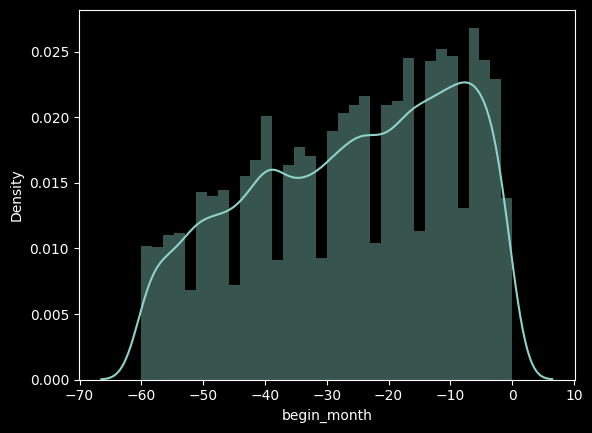

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

print(df['begin_month'].describe())
sns.distplot(df['begin_month']);

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -13481.50)",17769,0.671618,6112,11657,0.656030,-0.064457,0.002764,0.000345
1,"[-13481.50, -9971.50)",7138,0.269796,2692,4446,0.622864,0.079476,0.001723,0.000215
2,"[-9971.50, inf)",1550,0.058586,685,865,0.558065,0.347885,0.007379,0.000918
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,26457,1.000000,9489,16968,0.641343,,0.011866,0.001478


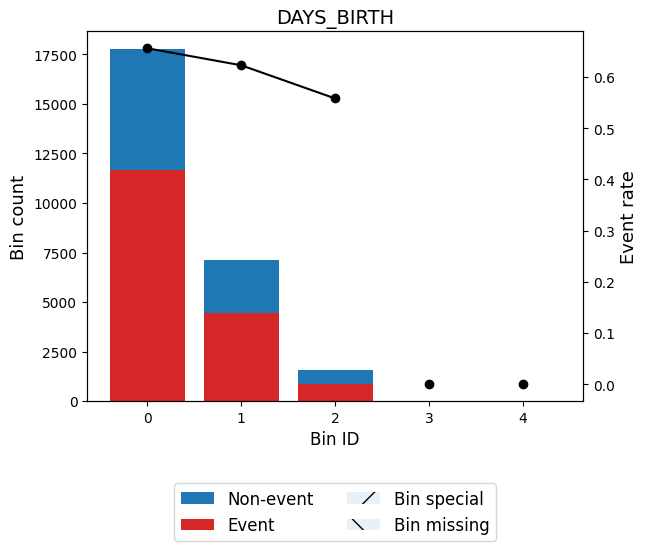

In [ ]:
plt.style.use(['default'])
# ▶ numeric one col plotting
variable = 'DAYS_BIRTH'
x = df[variable].values
y = df.credit
# max_n_prebins
optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", max_n_prebins=3)
optb.fit(x, y)
# print("split points : ", optb.splits)

binning_table = optb.binning_table
v1 = binning_table.build()

display(v1)
binning_table.plot(metric="event_rate")

count    26457.000000
mean    -15958.053899
std       4201.589022
min     -25152.000000
25%     -19431.000000
50%     -15547.000000
75%     -12446.000000
max      -7705.000000
Name: DAYS_BIRTH, dtype: float64


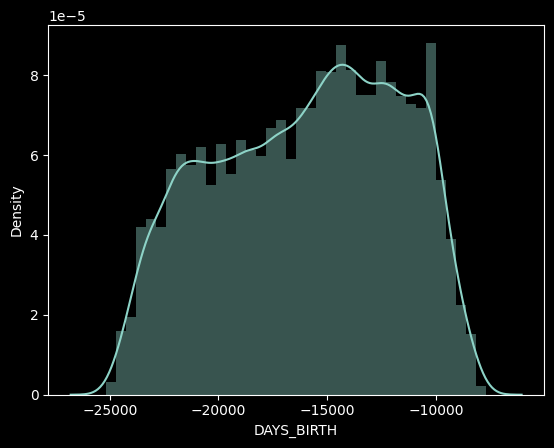

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

print(df['DAYS_BIRTH'].describe())
sns.distplot(df['DAYS_BIRTH']);

In [ ]:
# ▶ bin 활용 labeling (1)
x_transform_bins = optb.transform(df['DAYS_BIRTH'], metric="bins")
df_bin = pd.DataFrame(df['credit'])
df_bin['bin'] = x_transform_bins
df_bin.head()

,credit,bin
0,0,"(-inf, -13481.50)"
1,0,"[-13481.50, -9971.50)"
2,1,"(-inf, -13481.50)"
3,0,"(-inf, -13481.50)"
4,1,"(-inf, -13481.50)"


In [ ]:
# ▶ bin 활용 labeling (2)
eda_df = df_bin.groupby('bin')['credit'].agg(cnt =('count'), t_cnt=('sum')).reset_index()
eda_df['t_ratio'] = eda_df['t_cnt'] / eda_df['cnt']
eda_df

,bin,cnt,t_cnt,t_ratio
0,"(-inf, -13481.50)",17769,11657,0.656030
1,"[-13481.50, -9971.50)",7138,4446,0.622864
2,"[-9971.50, inf)",1550,865,0.558065


> #### **└ Categorical features**

In [ ]:
df[categorical_list].head()

,gender,car,reality,income_type,edu_type,family_type,house_type,occyp_type,credit,work_phone,phone,email,FLAG_MOBIL
0,F,N,N,Commercial associate,Higher education,Married,Municipal apartment,etc,0,0,0,0,1
1,F,N,Y,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,Laborers,0,0,0,1,1
2,M,Y,Y,Working,Higher education,Married,House / apartment,Managers,1,0,1,0,1
3,F,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,Sales staff,0,0,1,0,1
4,F,Y,Y,State servant,Higher education,Married,House / apartment,Managers,1,0,0,0,1


,gender,cnt,t_cnt,t_ratio
0,F,17697,11329,0.640165
1,M,8760,5639,0.643721


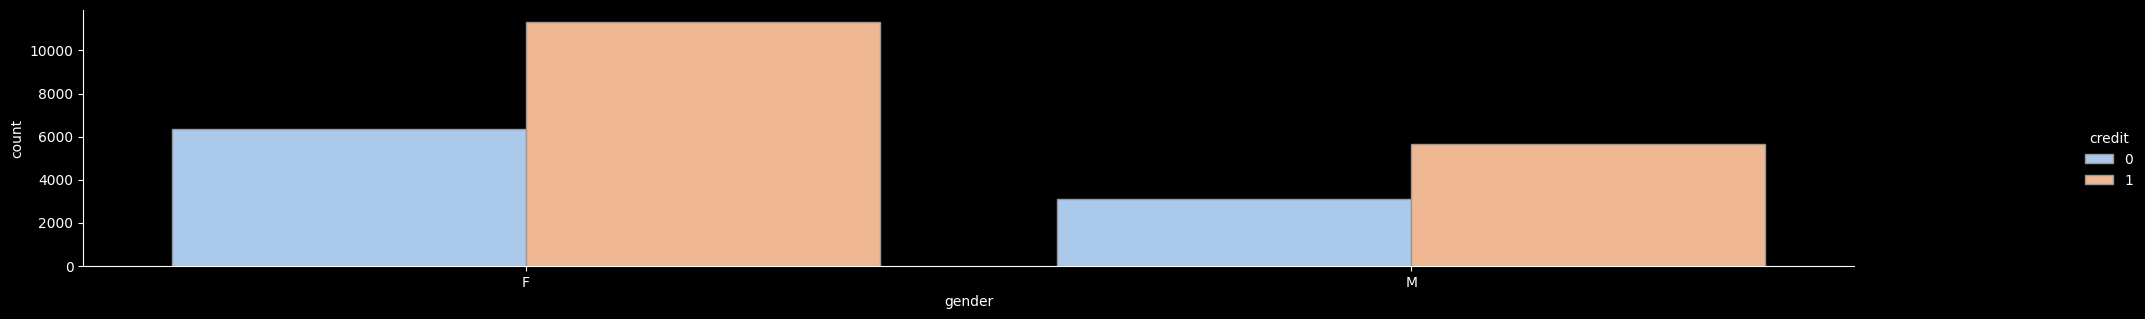

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

val = 'gender'

# ▶ target 기준(hue,색상)으로 구분하여 Plot
sns.catplot(x = val, hue="credit", kind="count",palette="pastel", edgecolor=".6",data=df);
# plt.xticks(rotation=-20)
plt.gcf().set_size_inches(25, 3)

# ▶ sample col eda
eda_df = df.groupby(val)['credit'].agg(cnt =('count'), t_cnt=('sum')).reset_index()
eda_df['t_ratio'] = eda_df['t_cnt'] / eda_df['cnt']
display(eda_df)

split points :  [array(['Waiters/barmen staff', 'IT staff', 'Secretaries', 'Accountants',
       'High skill tech staff'], dtype=object), array(['Sales staff'], dtype=object), array(['Private service staff', 'Laborers'], dtype=object), array(['Cooking staff', 'Core staff'], dtype=object), array(['etc'], dtype=object), array(['Drivers'], dtype=object), array(['Managers', 'Low-skill Laborers', 'Cleaning staff'], dtype=object), array(['Medicine staff', 'Realty agents', 'Security staff', 'HR staff'],
      dtype=object)]


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[Waiters/barmen staff, IT staff, Secretaries, ...",2204,0.083305,856,1348,0.611615,0.127089,0.001368,0.000171
1,[Sales staff],2539,0.095967,943,1596,0.628594,0.055006,0.000293,0.000037
2,"[Private service staff, Laborers]",4755,0.179726,1758,2997,0.630284,0.047761,0.000413,0.000052
3,"[Cooking staff, Core staff]",3103,0.117285,1137,1966,0.633580,0.033588,0.000133,0.000017
4,[etc],8171,0.308841,2905,5266,0.644474,-0.013642,0.000057,0.000007
5,[Drivers],1575,0.059531,545,1030,0.653968,-0.055332,0.000181,0.000023
6,"[Managers, Low-skill Laborers, Cleaning staff]",2697,0.101939,914,1783,0.661105,-0.087026,0.000762,0.000095
7,"[Medicine staff, Realty agents, Security staff...",1413,0.053407,431,982,0.694975,-0.242287,0.003017,0.000376
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


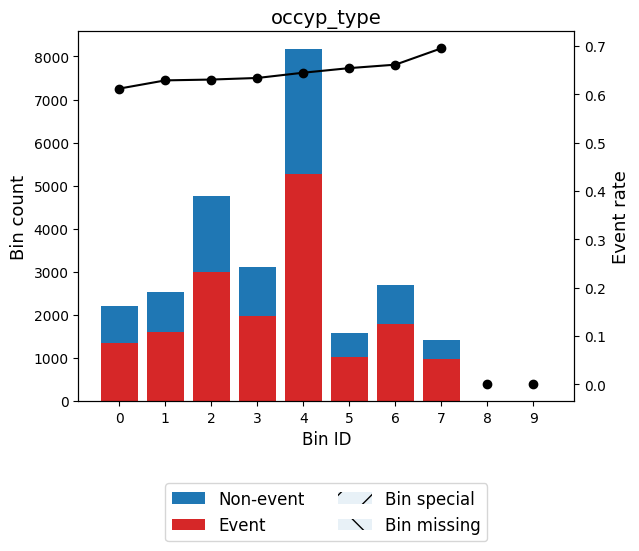

In [ ]:
plt.style.use(['default'])

# ▶ Categorical one col plotting
variable = 'occyp_type'
x = df[variable].values
y = df.credit
# max_n_prebins
optb = OptimalBinning(name=variable, dtype="categorical", solver="cp")
optb.fit(x, y)
print("split points : ", optb.splits)

binning_table = optb.binning_table
v1 = binning_table.build()

display(v1)
binning_table.plot(metric="event_rate")

In [ ]:
optb.splits[7]

array(['Medicine staff', 'Realty agents', 'Security staff', 'HR staff'],
      dtype=object)

In [ ]:
# ▶ numeric
# !pip install optbinning
from optbinning import OptimalBinning

iv_df = []

for i in categorical_list :
  variable = i
  x = df[variable].values
  y = df.credit
  # max_n_prebins
  optb = OptimalBinning(name=variable, dtype="categorical")
  optb.fit(x, y)
  # print("split points : ", optb.splits)

  binning_table = optb.binning_table
  v1 = binning_table.build()

  loop_df = pd.DataFrame({'val' : variable,
                     'IV' : [v1.loc['Totals','IV']]})
  iv_df.append(loop_df)

iv_df = pd.concat(iv_df).reset_index(drop=True)
iv_df.sort_values(by=['IV'], ascending = False)


# binning_table.plot(metric="event_rate")

,val,IV
7,occyp_type,0.006224
5,family_type,0.004767
3,income_type,0.001783
6,house_type,0.001601
4,edu_type,0.001151
2,reality,0.001116
11,email,0.000967
1,car,0.000858
10,phone,0.000441
9,work_phone,0.000058


## **🥇Session 3**  
**┗ Modeling Process**  
---

### · Modeling
---
> **데이터 사전 준비**

```
* 모델은 숫자로 이루어진 형태의 Data만 인식 가능 (※ 문자형 변수 인코딩 필요)
* 모델링을 수행하기 위해 Feature와 예측하고자하는 값인 Y로 데이터를 나눔
* 학습과 예측을 위한 Train / Test set 분할
* Categorical value 인코딩
```
> **Model Selection (classification)**

```
* 로지스틱 모델 (logistic regression)
* Tree 계열 Classification 모델
  - bagging 앙상블 (Randomforest)
  - boosting 앙상블 (lightGBM)
```
> **Model 학습**

```
* Model Selection 단계에서 선정한 모델들을 학습하고 성능을 기록
* 동일한 Data set, 동일한 환경에서 동일한 비교 지표로 성능을 비교
```

> #### **└ 데이터 사전 준비**

In [ ]:
df.head(2)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,etc,2.0,-6.0,0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,0


In [ ]:
# ▶ 모델링을 학습하기 위한 Feature(X)와 Target(Y)데이터를 구분하는 단계
from sklearn.model_selection import train_test_split

X = df.drop(['index', 'credit', 'FLAG_MOBIL'], axis=1)
Y = df['credit']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=1234)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(18519, 17)
(18519,)
(7938, 17)
(7938,)


In [ ]:
df[categorical_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       26457 non-null  object
 1   car          26457 non-null  object
 2   reality      26457 non-null  object
 3   income_type  26457 non-null  object
 4   edu_type     26457 non-null  object
 5   family_type  26457 non-null  object
 6   house_type   26457 non-null  object
 7   occyp_type   26457 non-null  object
 8   work_phone   26457 non-null  int64 
 9   phone        26457 non-null  int64 
 10  email        26457 non-null  int64 
 11  FLAG_MOBIL   26457 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 2.4+ MB


In [ ]:
# categorical_list.remove('credit')
categorical_list.remove('work_phone')
categorical_list.remove('phone')
categorical_list.remove('email')
categorical_list.remove('FLAG_MOBIL')

In [ ]:
# ▶ (1) One hot encoding
from sklearn.preprocessing import OneHotEncoder

for col in categorical_list :
  encoder = OneHotEncoder()
  encoder.fit(x_train[[col]])
  onehot_train = pd.DataFrame(encoder.transform(x_train[[col]]).toarray(), columns = encoder.get_feature_names_out(), index=x_train.index)
  onehot_test = pd.DataFrame(encoder.transform(x_test[[col]]).toarray(), columns = encoder.get_feature_names_out(), index=x_test.index)
  # 기존 Col은 삭제
  x_train = pd.concat([x_train,onehot_train], axis = 1).drop(columns = [col])
  x_test = pd.concat([x_test,onehot_test], axis = 1).drop(columns = [col])

In [ ]:
x_train.head()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,occyp_type_etc
10232,2,225000.0,-10937,-1539,0,0,0,4.0,-41.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14594,0,202500.0,-8353,-1081,1,0,1,2.0,-13.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1685,1,135000.0,-13108,-1299,0,0,0,3.0,-25.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12841,0,135000.0,-21374,365243,0,0,0,2.0,-1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7881,0,112500.0,-20775,365243,0,0,0,2.0,-12.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
x_test.head()

,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,family_size,begin_month,gender_F,gender_M,car_N,car_Y,reality_N,reality_Y,income_type_Commercial associate,income_type_Pensioner,income_type_State servant,income_type_Student,income_type_Working,edu_type_Academic degree,edu_type_Higher education,edu_type_Incomplete higher,edu_type_Lower secondary,edu_type_Secondary / secondary special,family_type_Civil marriage,family_type_Married,family_type_Separated,family_type_Single / not married,family_type_Widow,house_type_Co-op apartment,house_type_House / apartment,house_type_Municipal apartment,house_type_Office apartment,house_type_Rented apartment,house_type_With parents,occyp_type_Accountants,occyp_type_Cleaning staff,occyp_type_Cooking staff,occyp_type_Core staff,occyp_type_Drivers,occyp_type_HR staff,occyp_type_High skill tech staff,occyp_type_IT staff,occyp_type_Laborers,occyp_type_Low-skill Laborers,occyp_type_Managers,occyp_type_Medicine staff,occyp_type_Private service staff,occyp_type_Realty agents,occyp_type_Sales staff,occyp_type_Secretaries,occyp_type_Security staff,occyp_type_Waiters/barmen staff,occyp_type_etc
23860,0,211500.0,-17249,-1661,1,1,0,2.0,-43.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26267,0,292500.0,-13434,-3515,0,0,1,1.0,-21.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
13972,0,90000.0,-19042,-3319,0,0,0,1.0,-15.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16839,1,90000.0,-9087,-1051,0,0,0,3.0,-1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26452,2,225000.0,-12079,-1984,0,0,0,4.0,-2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


> #### **└ Logistic Regression**

In [ ]:
# ▶ Logistic Regression 표준화(standardization) (※정규화(0~1), Normalization)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [ ]:
# ▶ Model 학습
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train_sc, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report

# ▶ 예측 및 성능 확인
y_pred_train = LR.predict(x_train_sc)
y_pred_test = LR.predict(x_test_sc)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.70      0.12      0.20      6642
           1       0.66      0.97      0.79     11877

    accuracy                           0.67     18519
   macro avg       0.68      0.55      0.50     18519
weighted avg       0.68      0.67      0.58     18519

              precision    recall  f1-score   support

           0       0.69      0.12      0.21      2847
           1       0.66      0.97      0.79      5091

    accuracy                           0.67      7938
   macro avg       0.68      0.55      0.50      7938
weighted avg       0.67      0.67      0.58      7938



In [ ]:
# ▶ 과적합 문제, Train과 Test set에 성능을 최대한 줄여주는 것이 과적합을 방지
from sklearn.metrics import roc_auc_score

y_pred_train_proba = LR.predict_proba(x_train_sc)[:, 1]
y_pred_test_proba = LR.predict_proba(x_test_sc)[:, 1]


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.6198037183144698
roc_score_test : 0.6195600106167505


In [ ]:
# ▶ 여러 Model의 성능 비교를 위한 빈 DataFrame 생성
df_comparison = pd.DataFrame(columns = {'model', 'f1_train', 'f1_test', 'AUC_train', 'AUC_test'})
df_comparison.columns = ['model', 'f1_train', 'f1_test', 'AUC_train', 'AUC_test']
df_comparison

,model,f1_train,f1_test,AUC_train,AUC_test


In [ ]:
# ▶ LR model에 대한 성능 값 추가
import sklearn.metrics as metrics

lr_re = pd.DataFrame({ 'model' : ['LR'],
                      'f1_train' :  metrics.f1_score(y_train,y_pred_train),
                      'f1_test' : metrics.f1_score(y_test,y_pred_test),
                      'AUC_train' : roc_auc_score(y_train, y_pred_train_proba),
                      'AUC_test' : roc_auc_score(y_test, y_pred_test_proba),}
                    )

df_comparison = df_comparison.append(lr_re)
df_comparison

,model,f1_train,f1_test,AUC_train,AUC_test
0,LR,0.788823,0.788082,0.619804,0.61956


> #### **└ Random Forest**

In [ ]:
# ▶ 모델링을 학습하기 위한 Feature(X)와 Target(Y)데이터를 구분하는 단계
from sklearn.model_selection import train_test_split

X = df.drop(['index', 'credit', 'FLAG_MOBIL'], axis=1)
Y = df['credit']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=1234)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(18519, 17)
(18519,)
(7938, 17)
(7938,)


In [ ]:
# ▶ (2) label encoding

from sklearn.preprocessing import LabelEncoder

for col in categorical_list :
  encoder = LabelEncoder()
  encoder.fit(x_train[[col]])

  # 기존 Col 대체
  x_train[col] = encoder.transform(x_train[col])
  x_test[col] = encoder.transform(x_test[col])

In [ ]:
x_train.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
10232,1,1,0,2,225000.0,2,1,1,5,-10937,-1539,0,0,0,6,4.0,-41.0
14594,1,0,1,0,202500.0,0,4,1,1,-8353,-1081,1,0,1,3,2.0,-13.0
1685,0,1,1,1,135000.0,4,4,1,1,-13108,-1299,0,0,0,18,3.0,-25.0
12841,0,0,1,0,135000.0,1,4,1,1,-21374,365243,0,0,0,18,2.0,-1.0
7881,0,1,1,0,112500.0,1,4,1,1,-20775,365243,0,0,0,18,2.0,-12.0


In [ ]:
x_test.head()

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,work_phone,phone,email,occyp_type,family_size,begin_month
23860,0,0,0,0,211500.0,4,4,1,1,-17249,-1661,1,1,0,18,2.0,-43.0
26267,0,0,1,0,292500.0,4,4,3,1,-13434,-3515,0,0,1,18,1.0,-21.0
13972,0,0,1,0,90000.0,4,4,2,1,-19042,-3319,0,0,0,18,1.0,-15.0
16839,1,1,0,1,90000.0,4,4,1,5,-9087,-1051,0,0,0,8,3.0,-1.0
26452,0,0,0,2,225000.0,2,4,1,1,-12079,-1984,0,0,0,3,4.0,-2.0


In [ ]:
# ▶ RandomForest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
#rfc = RandomForestClassifier(max_depth=2)
rfc.fit(x_train, y_train)

# ▶ 예측
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      6642
           1       0.98      0.99      0.99     11877

    accuracy                           0.98     18519
   macro avg       0.98      0.98      0.98     18519
weighted avg       0.98      0.98      0.98     18519

              precision    recall  f1-score   support

           0       0.67      0.52      0.58      2847
           1       0.76      0.86      0.81      5091

    accuracy                           0.73      7938
   macro avg       0.71      0.69      0.69      7938
weighted avg       0.73      0.73      0.73      7938



In [ ]:
# ▶ AUC
y_pred_train_proba = rfc.predict_proba(x_train)[:, 1]
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1]

roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.9991887767006172
roc_score_test : 0.7558815231904729


In [ ]:
# ▶ BayesianOptimization 설치
!pip install bayesian-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ▶ BayesianOptimization
import numpy as np
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score


def model_evaluate(n_estimators, maxDepth):
    clf = RandomForestClassifier(
        n_estimators= int(n_estimators),
        max_depth= int(maxDepth))
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='roc_auc')
    return np.mean(scores)


def bayesOpt(x_train, y_train):
    clfBO = BayesianOptimization(model_evaluate, {'n_estimators':  (100, 200),
                                                  'maxDepth': (2, 4)
                                                 })
    clfBO.maximize(init_points=5, n_iter=10)
    print(clfBO.res)

bayesOpt(x_train, y_train)

|   iter    |  target   | maxDepth  | n_esti... |
-------------------------------------------------
| 1         | 0.6249    | 2.429     | 179.7     |
| 2         | 0.6234    | 2.74      | 152.6     |
| 3         | 0.6254    | 2.196     | 141.2     |
| 4         | 0.6252    | 2.307     | 179.4     |
| 5         | 0.6352    | 3.094     | 149.7     |
| 6         | 0.6334    | 3.24      | 148.4     |
| 7         | 0.6239    | 2.0       | 149.2     |
| 8         | 0.6338    | 3.701     | 149.2     |
| 9         | 0.6342    | 3.647     | 150.3     |
| 10        | 0.6408    | 4.0       | 147.3     |
| 11        | 0.6326    | 3.995     | 146.3     |
| 12        | 0.6326    | 3.197     | 147.2     |
| 13        | 0.6328    | 3.999     | 148.0     |
| 14        | 0.6409    | 4.0       | 147.0     |
| 15        | 0.6318    | 3.497     | 119.5     |
[{'target': 0.6248903425928974, 'params': {'maxDepth': 2.4294442571680315, 'n_estimators': 179.701825573642}}, {'target': 0.6233768425271621, 'params'

In [ ]:
# ▶ RandomForest
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score

rfc = RandomForestClassifier(n_estimators=147, max_depth = 4, random_state= 1121)
rfc.fit(x_train, y_train)

# ▶ 예측
y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1]
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1]


rfc_re = pd.DataFrame({ 'model' : ['RFC(BO)'],
                      'f1_train' :  metrics.f1_score(y_train,y_pred_train),
                      'f1_test' : metrics.f1_score(y_test,y_pred_test),
                      'AUC_train' : roc_auc_score(y_train, y_pred_train_proba),
                      'AUC_test' : roc_auc_score(y_test, y_pred_test_proba),}
                    )
# rfc_re

df_comparison = df_comparison.append(rfc_re)
df_comparison.reset_index(drop=True, inplace = True)

In [ ]:
df_comparison

,model,f1_train,f1_test,AUC_train,AUC_test
0,LR,0.788823,0.788082,0.619804,0.61956
1,RFC(BO),0.812626,0.813795,0.663180,0.64457


> #### **└ LightGBM**

In [ ]:
# ▶ lightGBM
import lightgbm as lgbm
from lightgbm import LGBMClassifier

LGBM = lgbm.LGBMClassifier()
LGBM.fit(x_train, y_train)

LGBMClassifier()

In [ ]:
# ▶ 예측
y_pred_train = LGBM.predict(x_train)
y_pred_test = LGBM.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.32      0.47      6642
           1       0.72      0.99      0.83     11877

    accuracy                           0.75     18519
   macro avg       0.83      0.65      0.65     18519
weighted avg       0.80      0.75      0.71     18519

              precision    recall  f1-score   support

           0       0.84      0.27      0.41      2847
           1       0.71      0.97      0.82      5091

    accuracy                           0.72      7938
   macro avg       0.77      0.62      0.61      7938
weighted avg       0.75      0.72      0.67      7938



In [ ]:
# ▶ AUC
y_pred_train_proba = LGBM.predict_proba(x_train)[:, 1]
y_pred_test_proba = LGBM.predict_proba(x_test)[:, 1]

roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.850746936435714
roc_score_test : 0.719803027126184


In [ ]:
import numpy as np
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

def lgb_evaluate(learning_rate, n_estimators, maxDepth):
    clf = LGBMClassifier(
        objective = 'binary',
        metric= 'auc',
        learning_rate=float(learning_rate),
        n_estimators= int(n_estimators),
        max_depth= int(maxDepth))
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='roc_auc')
    return np.mean(scores)

def bayesOpt(train_x, train_y):
    lgbBO = BayesianOptimization(lgb_evaluate, {'learning_rate' : (0.01, 0.05),
                                                'n_estimators': (100, 200),
                                                'maxDepth': (2, 4)
                                               })
    lgbBO.maximize(init_points=5, n_iter=10)
    print(lgbBO.res)

bayesOpt(x_train, y_train)

|   iter    |  target   | learni... | maxDepth  | n_esti... |
-------------------------------------------------------------
| 1         | 0.6264    | 0.01999   | 2.393     | 192.2     |
| 2         | 0.6313    | 0.04916   | 2.774     | 150.2     |
| 3         | 0.6318    | 0.04566   | 2.107     | 155.7     |
| 4         | 0.6314    | 0.03159   | 3.724     | 143.6     |
| 5         | 0.624     | 0.01737   | 2.664     | 140.6     |
| 6         | 0.6303    | 0.03209   | 3.044     | 101.1     |
| 7         | 0.6299    | 0.02588   | 3.942     | 116.5     |
| 8         | 0.6286    | 0.0336    | 2.771     | 150.3     |
| 9         | 0.6245    | 0.01722   | 2.697     | 179.0     |
| 10        | 0.6298    | 0.01891   | 3.423     | 157.4     |
| 11        | 0.6307    | 0.02907   | 3.421     | 151.6     |
| 12        | 0.6299    | 0.03274   | 2.952     | 168.8     |
| 13        | 0.6315    | 0.03666   | 2.318     | 192.6     |
| 14        | 0.6286    | 0.04812   | 2.748     | 105.5     |
| 15    

In [ ]:
# ▶ lightGBM
from lightgbm import LGBMClassifier

# ▶ setting the parameters
LGBM = LGBMClassifier(learning_rate=0.03, n_estimators=200, max_depth=4, random_state=1234)
LGBM.fit(x_train, y_train)


# ▶ 예측
y_pred_train = LGBM.predict(x_train)
y_pred_test = LGBM.predict(x_test)

y_pred_train_proba = LGBM.predict_proba(x_train)[:, 1]
y_pred_test_proba = LGBM.predict_proba(x_test)[:, 1]

lgbm_re = pd.DataFrame({ 'model' : ['LGBM(BO)'],
                      'f1_train' :  metrics.f1_score(y_train,y_pred_train),
                      'f1_test' : metrics.f1_score(y_test,y_pred_test),
                      'AUC_train' : roc_auc_score(y_train, y_pred_train_proba),
                      'AUC_test' : roc_auc_score(y_test, y_pred_test_proba),}
                    )
# lgbm_re
df_comparison = df_comparison.append(lgbm_re)
df_comparison.reset_index(drop=True, inplace = True)

In [ ]:
df_comparison

,model,f1_train,f1_test,AUC_train,AUC_test
0,LR,0.788823,0.788082,0.619804,0.619560
1,RFC(BO),0.812626,0.813795,0.663180,0.644570
2,LGBM(BO),0.814061,0.813647,0.686329,0.656128


### · Modeling evaluation
---
> **전체 모델 성능 평가**

```
* Hyper-parameter tunning 전 전체 모델 성능 비교
```

In [ ]:
df_comparison.style.background_gradient(cmap='coolwarm', low=1)

,model,f1_train,f1_test,AUC_train,AUC_test
0,LR,0.788823,0.788082,0.619804,0.619560
1,RFC(BO),0.812626,0.813795,0.663180,0.644570
2,LGBM(BO),0.814061,0.813647,0.686329,0.656128


> **해석**

```
* Label encoder를 활용한 Tree 모델의 성능이 대부분 우수
* f1 score는 비등하나, LGBM(BO)가 AUC에서 더 우수함으로 LGBM 선택
```

### · Summary
---
> **모델 해석 및 현업 Operation 설계**

```
* 최종 선택된 모델의 중요 변수 탐색
* 모델 Operation Check 사항 점검
```

> #### **└ 모델 해석**

In [ ]:
# ▶ shap
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 13.3 MB/s eta 0:00:00


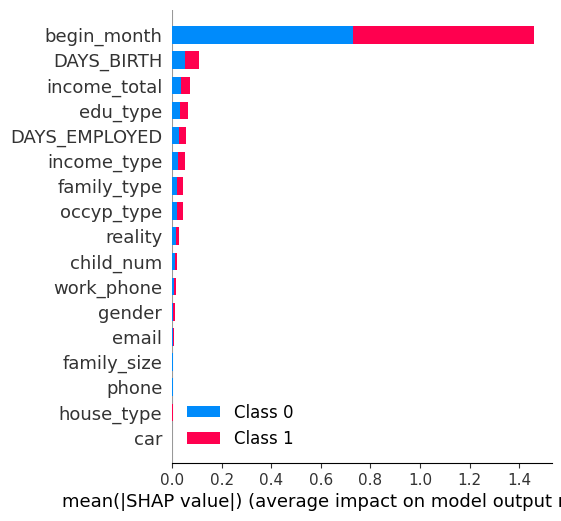

In [ ]:
import shap
plt.style.use(['default'])

shap.initjs()
# ▶ LGBM shap
explainer = shap.TreeExplainer(LGBM)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, feature_names=x_train.columns, plot_type="bar", show=False)
plt.gcf().set_size_inches(5,5)
plt.show()

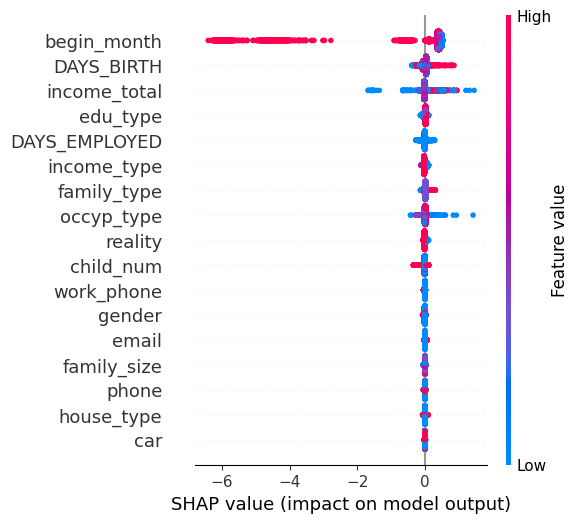

In [ ]:
# ▶ LGBM shap global
shap.initjs()
shap.summary_plot(shap_values[1], x_train, show=False)
plt.gcf().set_size_inches(5,5)
plt.show()

In [ ]:
# ▶ LGBM shap local
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][5,:] , x_train.iloc[5,:], link='logit')

In [ ]:
y_pred_train_proba[5]

0.45401702211344147

In [ ]:
# ▶ train target
import numpy as np

bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
lift_base = y_train.value_counts(normalize=True)[1]

# ▶ bin 고정 scoring /  [ : 포함, ) : 포함X
confusion_matrix1 = pd.crosstab(pd.cut(y_pred_train_proba, bins, right=False), y_train , rownames=['Predicted'], colnames=['Actual'], margins=True)

# confusion_matrix1 = pd.crosstab(pd.qcut(y_pred_train_proba, 10), y_train , rownames=['Predicted'], colnames=['Actual'], margins=True)
confusion_matrix1['ratio']=round((pd.DataFrame(confusion_matrix1)[1]/pd.DataFrame(confusion_matrix1)['All']),2)
confusion_matrix1['Lift']=round(confusion_matrix1['ratio']/lift_base,1)
confusion_matrix1

Actual,0,1,All,ratio,Lift
Predicted,,,,,
"[0.0, 0.1)",1170,1,1171,0.00,0.0
"[0.1, 0.2)",7,3,10,0.30,0.5
"[0.2, 0.3)",6,3,9,0.33,0.5
"[0.3, 0.4)",56,12,68,0.18,0.3
"[0.4, 0.5)",142,94,236,0.40,0.6
"[0.5, 0.6)",318,293,611,0.48,0.7
"[0.6, 0.7)",3114,5665,8779,0.65,1.0
"[0.7, 0.8)",1827,5753,7580,0.76,1.2
"[0.8, 0.9)",2,53,55,0.96,1.5


In [ ]:
# ▶ test target
# bins=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
bins=[0.0, 0.3, 0.7, 1.0]
lift_base = y_test.value_counts(normalize=True)[1]

confusion_matrix1 = pd.crosstab(pd.cut(y_pred_test_proba, bins, right=False), y_test , rownames=['Predicted'], colnames=['Actual'], margins=True)
confusion_matrix1['ratio']=round((pd.DataFrame(confusion_matrix1)[1]/pd.DataFrame(confusion_matrix1)['All']),2)
confusion_matrix1['Lift']=round(confusion_matrix1['ratio']/lift_base,1)
confusion_matrix1

Actual,0,1,All,ratio,Lift
Predicted,,,,,
"[0.0, 0.3)",527,7,534,0.01,0.0
"[0.3, 0.7)",1463,2756,4219,0.65,1.0
"[0.7, 1.0)",857,2328,3185,0.73,1.1
All,2847,5091,7938,0.64,1.0



> #### **└ wrap up**

```
* 데이터 전처리
* 데이터 EDA
* Feature Engineering
* Modeling
* XAI
* Model Operation
```